https://www.kaggle.com/c/dogs-vs-cats/data


Extracting Dataset using Kaggle API

In [ ]:
#installing the Kaggle library
!pip install Kaggle

In [ ]:
#configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

importing the Dog vs Cat Dataset from kaggle

In [ ]:
#kaggle API
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'
with ZipFile(dataset, 'r') as zip: #zip here is a variable, u can name it as u want
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
#extracting the compressed train.zip file

with ZipFile('/content/train.zip', 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
#counting the number of files in train folder
import os
path, dirs, files = next(os.walk('/content/train'))
files_count = len(files)
print('Number os images: ', files_count)

Number os images:  25000


Printing the names of images

In [ ]:
file_names = os.listdir('/content/train')
print(file_names)

['cat.8372.jpg', 'cat.10054.jpg', 'cat.1963.jpg', 'cat.4913.jpg', 'dog.1725.jpg', 'cat.1936.jpg', 'cat.4863.jpg', 'cat.4980.jpg', 'dog.5038.jpg', 'cat.4811.jpg', 'dog.3812.jpg', 'dog.8939.jpg', 'cat.12384.jpg', 'dog.8812.jpg', 'dog.4129.jpg', 'cat.11004.jpg', 'cat.10161.jpg', 'dog.8682.jpg', 'dog.5969.jpg', 'dog.10101.jpg', 'dog.491.jpg', 'cat.3983.jpg', 'dog.11575.jpg', 'cat.10816.jpg', 'cat.3563.jpg', 'dog.5231.jpg', 'dog.10413.jpg', 'cat.2805.jpg', 'dog.6397.jpg', 'dog.7321.jpg', 'dog.10539.jpg', 'dog.939.jpg', 'dog.1629.jpg', 'dog.2021.jpg', 'cat.11456.jpg', 'cat.8618.jpg', 'cat.9137.jpg', 'dog.7734.jpg', 'dog.1823.jpg', 'cat.3817.jpg', 'cat.11841.jpg', 'dog.8305.jpg', 'cat.1787.jpg', 'cat.114.jpg', 'cat.9654.jpg', 'cat.7521.jpg', 'cat.3118.jpg', 'cat.199.jpg', 'dog.5916.jpg', 'dog.1137.jpg', 'cat.10347.jpg', 'cat.4152.jpg', 'cat.5571.jpg', 'dog.6734.jpg', 'dog.6892.jpg', 'cat.94.jpg', 'dog.7385.jpg', 'cat.148.jpg', 'cat.3885.jpg', 'dog.8225.jpg', 'dog.8291.jpg', 'dog.4234.jpg', 'c

In [ ]:
file_names[-1]

'cat.9087.jpg'

Importing the Dependencies

In [ ]:
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow


Displaying the images of dogs and cats

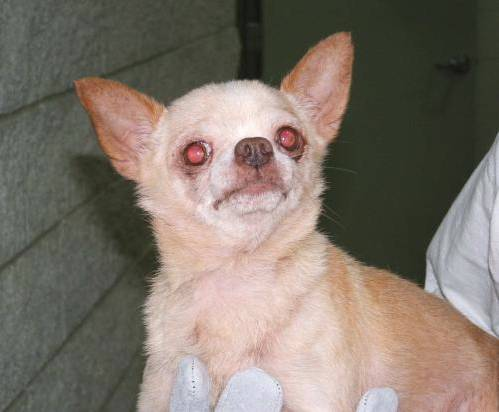

In [ ]:
# Displaying Dog image
img = cv2.imread('/content/train/dog.7716.jpg')
cv2_imshow(img)

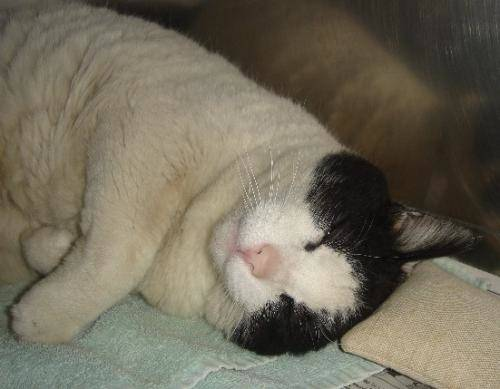

In [ ]:
#Displaying Cat image
img = cv2.imread('/content/train/cat.7157.jpg')
cv2_imshow(img)

In [ ]:
#creating a list of names of image in train folder
file_names = os.listdir('/content/train')

dog_num = 0
cat_num = 0
for img in  file_names:
  if img[0:3] == 'dog':
    dog_num+=1
  else:
    cat_num+=1

print('dog : ',dog_num)
print('cat : ',cat_num)

dog :  12500
cat :  12500


Resizeing all the Images

In [ ]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [ ]:
original_folder = '/content/train/'
resized_foler = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = resized_foler+filename
  img.save(newImgPath)


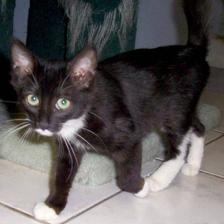

In [ ]:
# Displaying resized Dog image
img = cv2.imread('/content/image resized/cat.8372.jpg')
cv2_imshow(img)

**Creating Labels for resized images of dogs and cat**

cat -> 0

dog -> 1

In [ ]:
#create a for loop to assign labels

labels = []
file_names = os.listdir('/content/image resized/')

for file in file_names:

  if file[0:3] == 'dog':
    labels.append(1)
  else:
    labels.append(0)

In [ ]:
print(file_names[0:5])
print(len(file_names))

['cat.8372.jpg', 'cat.10054.jpg', 'cat.1963.jpg', 'cat.4913.jpg', 'dog.1725.jpg']
2000


In [ ]:
print(labels[0:5])
print(len(labels))

[0, 0, 0, 0, 1]
2000


In [ ]:
#counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1016  984]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=6, stratify=y)

In [ ]:
print(x_test.shape, x_train.shape)

(400, 224, 224, 3) (1600, 224, 224, 3)


**Scalling the data**

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
print(x_train)

**Building the Neural Network**

In [ ]:
# importing the library for training the model and adding the neural network layers

import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
model = models.Sequential([
    tf.keras.layers.InputLayer((224,224,3)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)


Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.5037 - loss: 1.3481
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.5405 - loss: 0.6917
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.6488 - loss: 0.6323
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.7496 - loss: 0.5467
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.8622 - loss: 0.3380


In [ ]:
score, acc = model.evaluate(x_test, y_test)
print('Test loss = ', score)
print('Test accuracy = ', acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5589 - loss: 0.7696
Test loss =  0.7442014217376709
Test accuracy =  0.6075000166893005


Pre-Trained Models


In [ ]:
from tensorflow.keras.applications import VGG16

# Load the VGG16 model with weights pre-trained on 'imagenet' and exclude the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential([
    base_model,  # Add the VGG16 model as part of the network
    layers.Flatten(),  # Flatten the output
    layers.Dense(64, activation='relu'),  # Hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer
])


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(x_train, y_train, epochs=5)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 22s 137ms/step - accuracy: 0.6236 - loss: 1.1071
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - accuracy: 0.9365 - loss: 0.1915
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 141ms/step - accuracy: 0.9678 - loss: 0.1232
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step - accuracy: 0.9890 - loss: 0.0746
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step - accuracy: 0.9972 - loss: 0.0495


In [ ]:
score, acc = model.evaluate(x_test, y_test)
print('Test loss = ', score)
print('Test accuracy = ', acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 864ms/step - accuracy: 0.9029 - loss: 0.2275
Test loss =  0.18952013552188873
Test accuracy =  0.9175000190734863


In [ ]:
from tensorflow.keras.applications import MobileNetV2

# Load the pre-trained MobileNetV2 model with weights from 'imagenet'
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Build the final model
model = models.Sequential([
    base_model,  # Add the MobileNetV2 model as part of the network
    layers.Flatten(),  # Flatten the output
    layers.Dense(64, activation='relu'),  # Hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer
])


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(x_train, y_train, epochs=5)


Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9011 - loss: 0.4995
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9786 - loss: 0.1255
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9886 - loss: 0.0389
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9943 - loss: 0.0232
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9956 - loss: 0.0199


In [ ]:
score, acc = model.evaluate(x_test, y_test)
print('Test loss = ', score)
print('Test accuracy = ', acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 201ms/step - accuracy: 0.9494 - loss: 0.5215
Test loss =  0.3930913507938385
Test accuracy =  0.9624999761581421


**Predictive System**

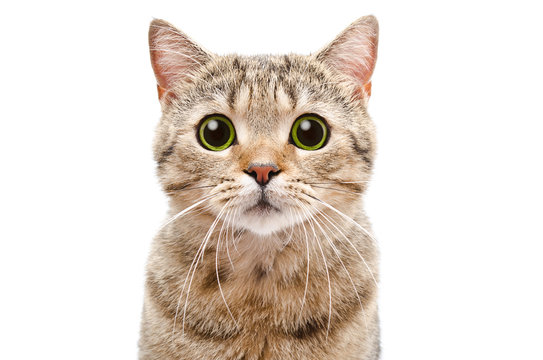

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
The image represents a Cat


In [ ]:



input_img = cv2.imread('/content/cat.jpg')
cv2_imshow(input_img)

#resize img and convert to RGB
resized_img = cv2.resize(input_img, (224,224))

#scalling
img_scaled = resized_img/255

#reshape
img_resaped = np.reshape(img_scaled, [1,224,224,3])

#prediction
img_pred = model.predict(img_resaped)



if img_pred < 0.5:
  print('The image represents a Cat')
else:
  print('The image represents a Dog')